## Reading File 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataFrame = pd.read_csv('./Arquivos/HIST_PAINEL_COVIDBR_04mai2021.csv', sep=';')

<h3 style='color:#ff335f'> Before removing noisy data </h3>

In [3]:
dataFrame

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270941,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-04-30,17,3015268.0,378783,1127,7798,37,NaN,NaN,1.0
2270942,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-05-01,17,3015268.0,379752,969,7826,28,NaN,NaN,1.0
2270943,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-05-02,18,3015268.0,380639,887,7855,29,NaN,NaN,1.0
2270944,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-05-03,18,3015268.0,381468,829,7883,28,NaN,NaN,1.0


## Noisy Data

<span style="color:#3385ff"> **Removing noisy 'regiao' and set index**</span>

In [4]:
# Copy brasil data
dataFrameBrasil = dataFrame[dataFrame['regiao'] == 'Brasil']

# Remove 'Brasil' region
indexNames = dataFrame[dataFrame['regiao'] == 'Brasil'].index
dataFrame.drop(indexNames, inplace=True)

dataFrame.set_index('regiao', inplace=True)

<span style='color:#3385ff'> **Removing noisy 'municipio'** </span>

In [5]:
dataFrame['municipio'].isnull().sum()

20229

In [6]:
dataFrame['municipio'].fillna('NI',inplace=True)

In [7]:
dataFrame['municipio'].isnull().sum()

0

<span style='color:#3385ff'> **Removing noisy 'codRegiaoSaude'** </span>

In [8]:
dataFrame['nomeRegiaoSaude'].isnull().sum()

20229

In [9]:
dataFrame['nomeRegiaoSaude'].fillna('NI', inplace=True)

In [10]:
dataFrame['nomeRegiaoSaude'].isnull().sum()

0

<span style='color:#3385ff'> **Removing noisy 'populacaoTCU2019'** </span>

In [11]:
dataFrame['populacaoTCU2019'].isnull().sum()

8484

In [12]:
dataFrame['populacaoTCU2019'].fillna(0, inplace=True)

In [13]:
dataFrame['populacaoTCU2019'].isnull().sum()

0

 <span style='color:#3385ff'> **Removing noisy 'Recuperadosnovos' and 'emAcompanhamentoNovos'** </span>

In [14]:
dataFrame['Recuperadosnovos'].notna().sum()

0

In [15]:
dataFrame['emAcompanhamentoNovos'].notna().sum()

0

In [16]:
del dataFrame['Recuperadosnovos']
del dataFrame['emAcompanhamentoNovos']

 <span style='color:#3385ff'> **Remove column useless** </span>

In [17]:
del dataFrame['coduf']
del dataFrame['codRegiaoSaude']
del dataFrame['codmun']
del dataFrame['semanaEpi']
del dataFrame['interior/metropolitana']

 <h3 style='color:#ff335f'> After removing noisy data </h3>

In [18]:
dataFrame.isnull().sum()

estado              0
municipio           0
nomeRegiaoSaude     0
data                0
populacaoTCU2019    0
casosAcumulado      0
casosNovos          0
obitosAcumulado     0
obitosNovos         0
dtype: int64

In [19]:
dataFrame

,estado,municipio,nomeRegiaoSaude,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
regiao,,,,,,,,,
Norte,RO,NI,NI,2020-02-25,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-26,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-27,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-28,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-29,1777225.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-04-30,3015268.0,378783,1127,7798,37
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-05-01,3015268.0,379752,969,7826,28
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-05-02,3015268.0,380639,887,7855,29


## Data Visualization 

In [41]:
estados = dataFrame.groupby('estado')
estados.size()

estado
AC      9323
AL     42047
AM     25483
AP      6899
BA    169307
CE     75175
DF       839
ES     32351
GO    100223
MA     88507
MG    345451
MS     32351
MT     57803
PA     58611
PB     90931
PE     75579
PI     91335
PR    162035
RJ     38007
RN     68307
RO     21847
RR      6899
RS    201627
SC    120019
SE     31139
SP    261419
TO     56995
dtype: int64

In [42]:
# Filtrando por mês ("2020-03-01" - "2021-05-01")
def filtro_mes():
    filtro_data = [
        "2020-03-01",
        "2020-04-01",
        "2020-05-01",
        "2020-06-01",
        "2020-07-01",
        "2020-08-01",
        "2020-09-01",
        "2020-10-01",
        "2020-11-01",
        "2020-12-01",
        "2020-01-01",
        "2021-02-01",
        "2021-03-01",
        "2021-04-01",
        "2021-05-01",
    ]
    temp = pd.DataFrame({})

    for data in filtro_data:
        temp = temp.append(dataFrame[dataFrame['data'] == data])
    
    return temp

<AxesSubplot:xlabel='estado'>

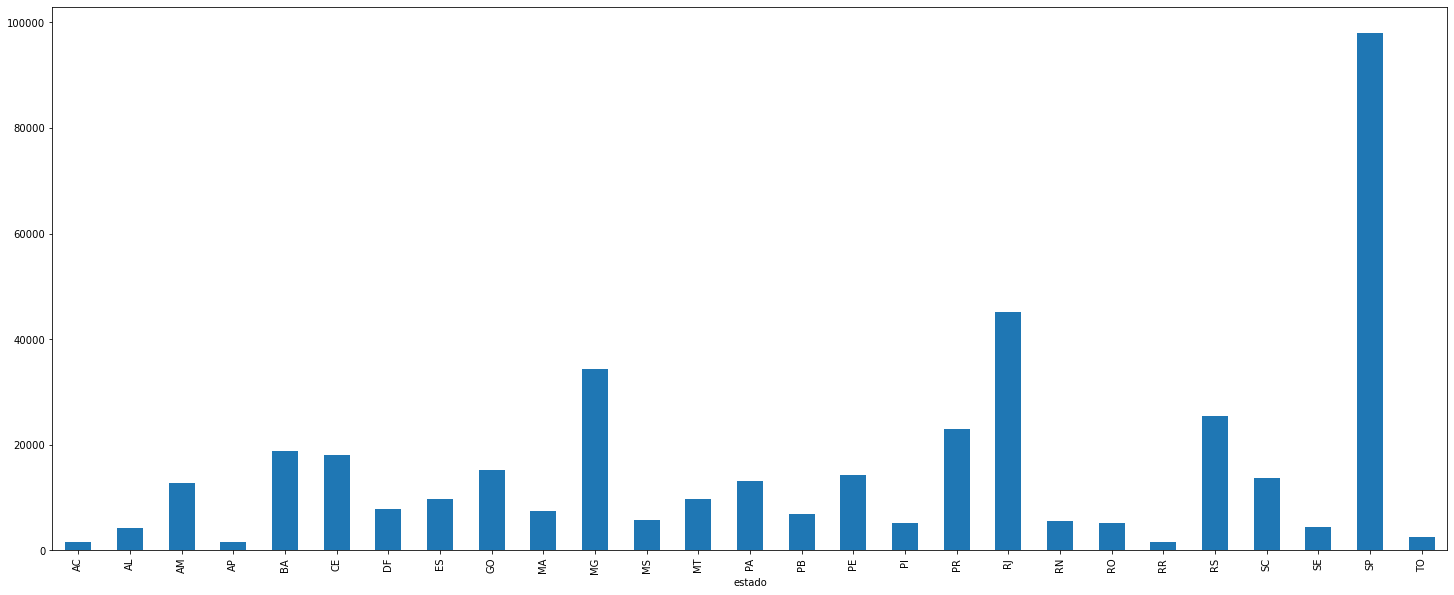

In [74]:
a = estados['obitosAcumulado'].max()
a.plot.bar(figsize=(25,10))

<AxesSubplot:xlabel='estado'>

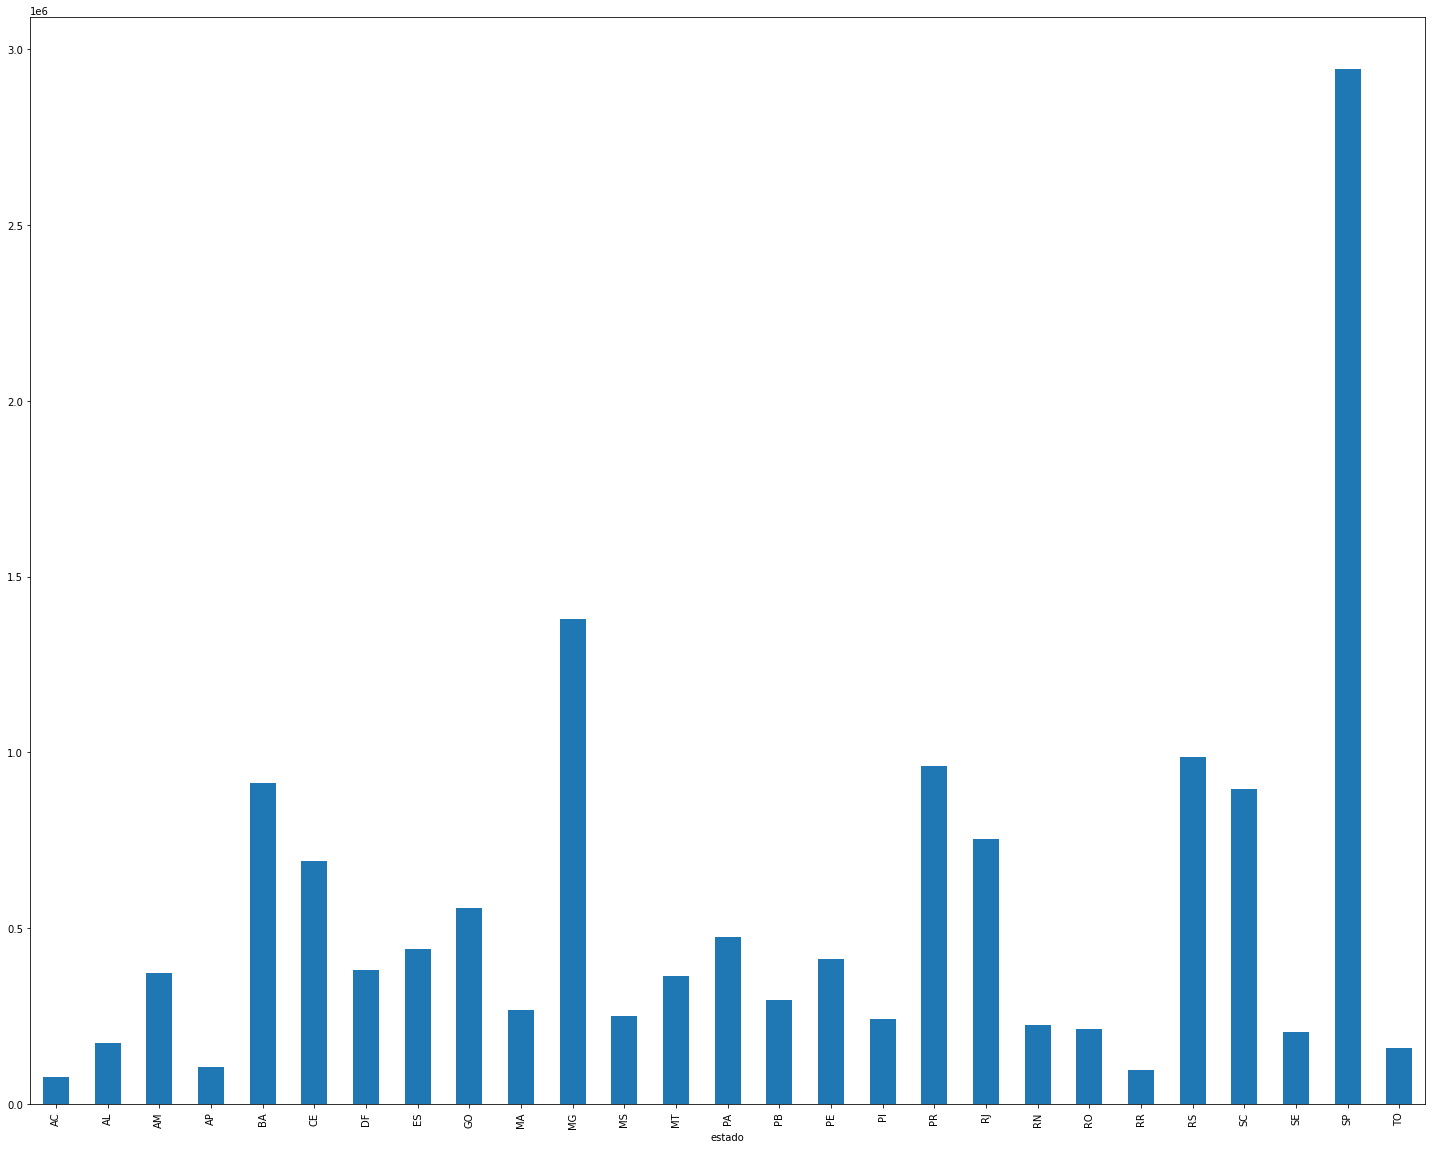

In [84]:
a = estados['casosAcumulado'].max()
a.plot.bar(figsize=(25,20))

In [76]:
alagoas = dataFrame[dataFrame['estado'] == 'AL']

In [77]:
# Filtrando por mês ("2020-03-01" - "2021-05-01")
def filtro_mes():
    filtro_data = [
        "2020-03-01",
        "2020-04-01",
        "2020-05-01",
        "2020-06-01",
        "2020-07-01",
        "2020-08-01",
        "2020-09-01",
        "2020-10-01",
        "2020-11-01",
        "2020-12-01",
        "2020-01-01",
        "2021-02-01",
        "2021-03-01",
        "2021-04-01",
        "2021-05-01",
    ]

    alagoas = dataFrame[dataFrame['estado'] == 'AL']

    temp = pd.DataFrame({})

    for data in filtro_data:
        temp = temp.append(alagoas[alagoas['data'] == data])
    
    return temp

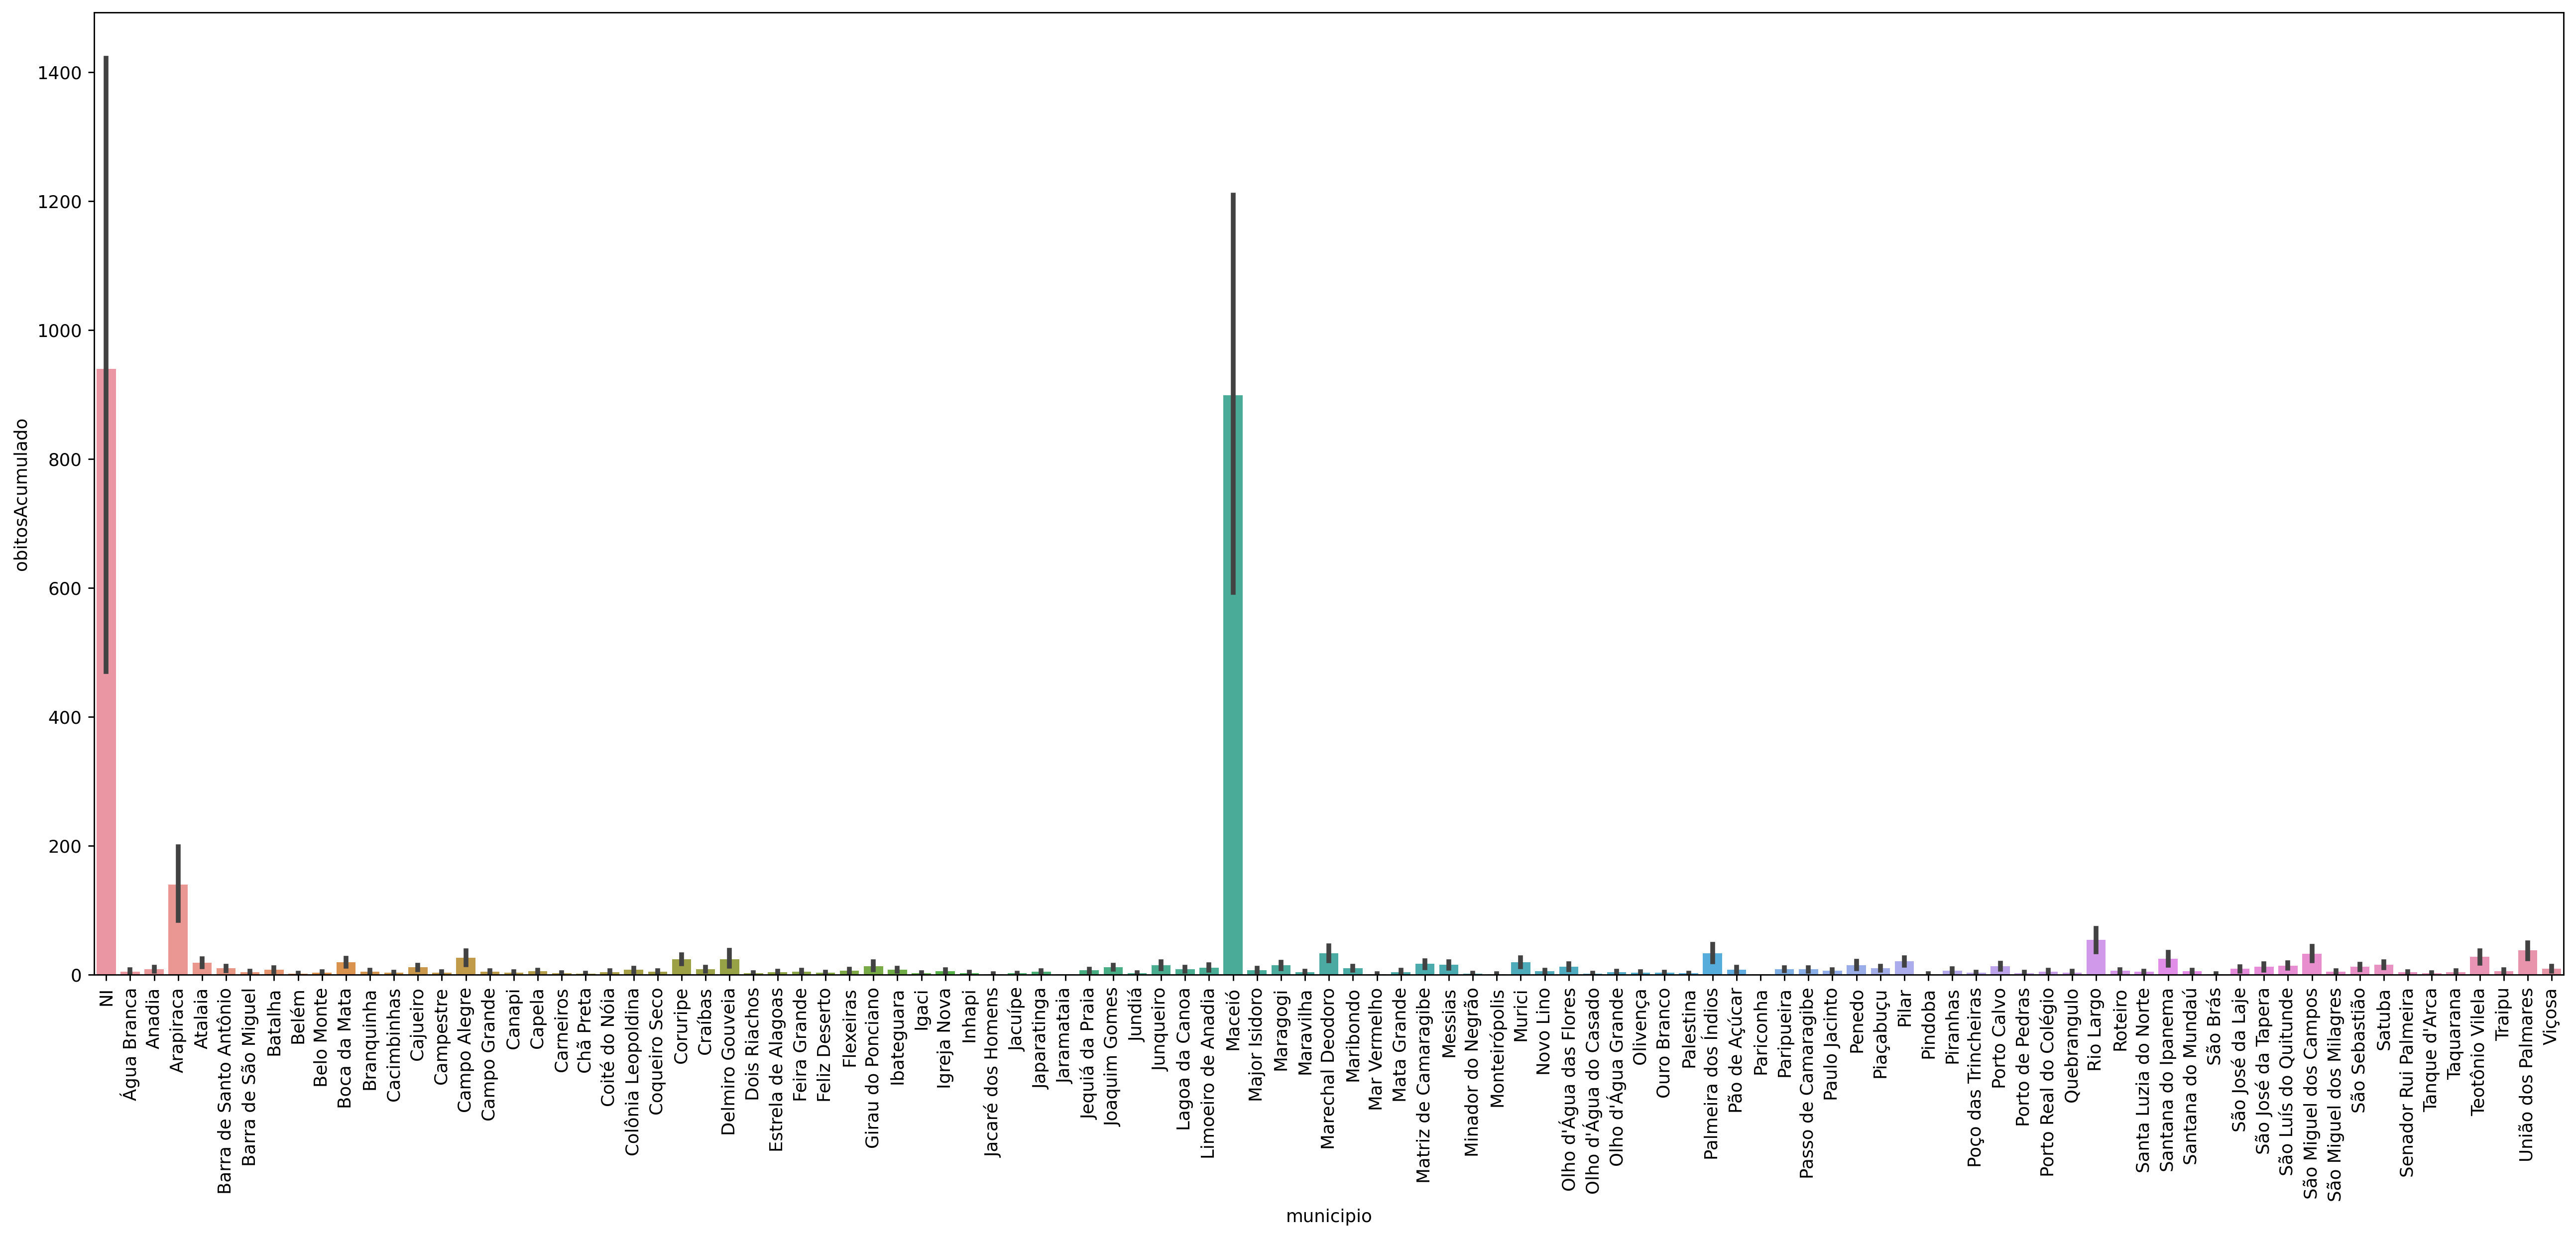

In [78]:
temp = filtro_mes()

plt.figure(figsize=(25,10), dpi=256)
sns.barplot(x='municipio',y='obitosAcumulado',data=temp)
plt.xticks(rotation=90)
plt.show()

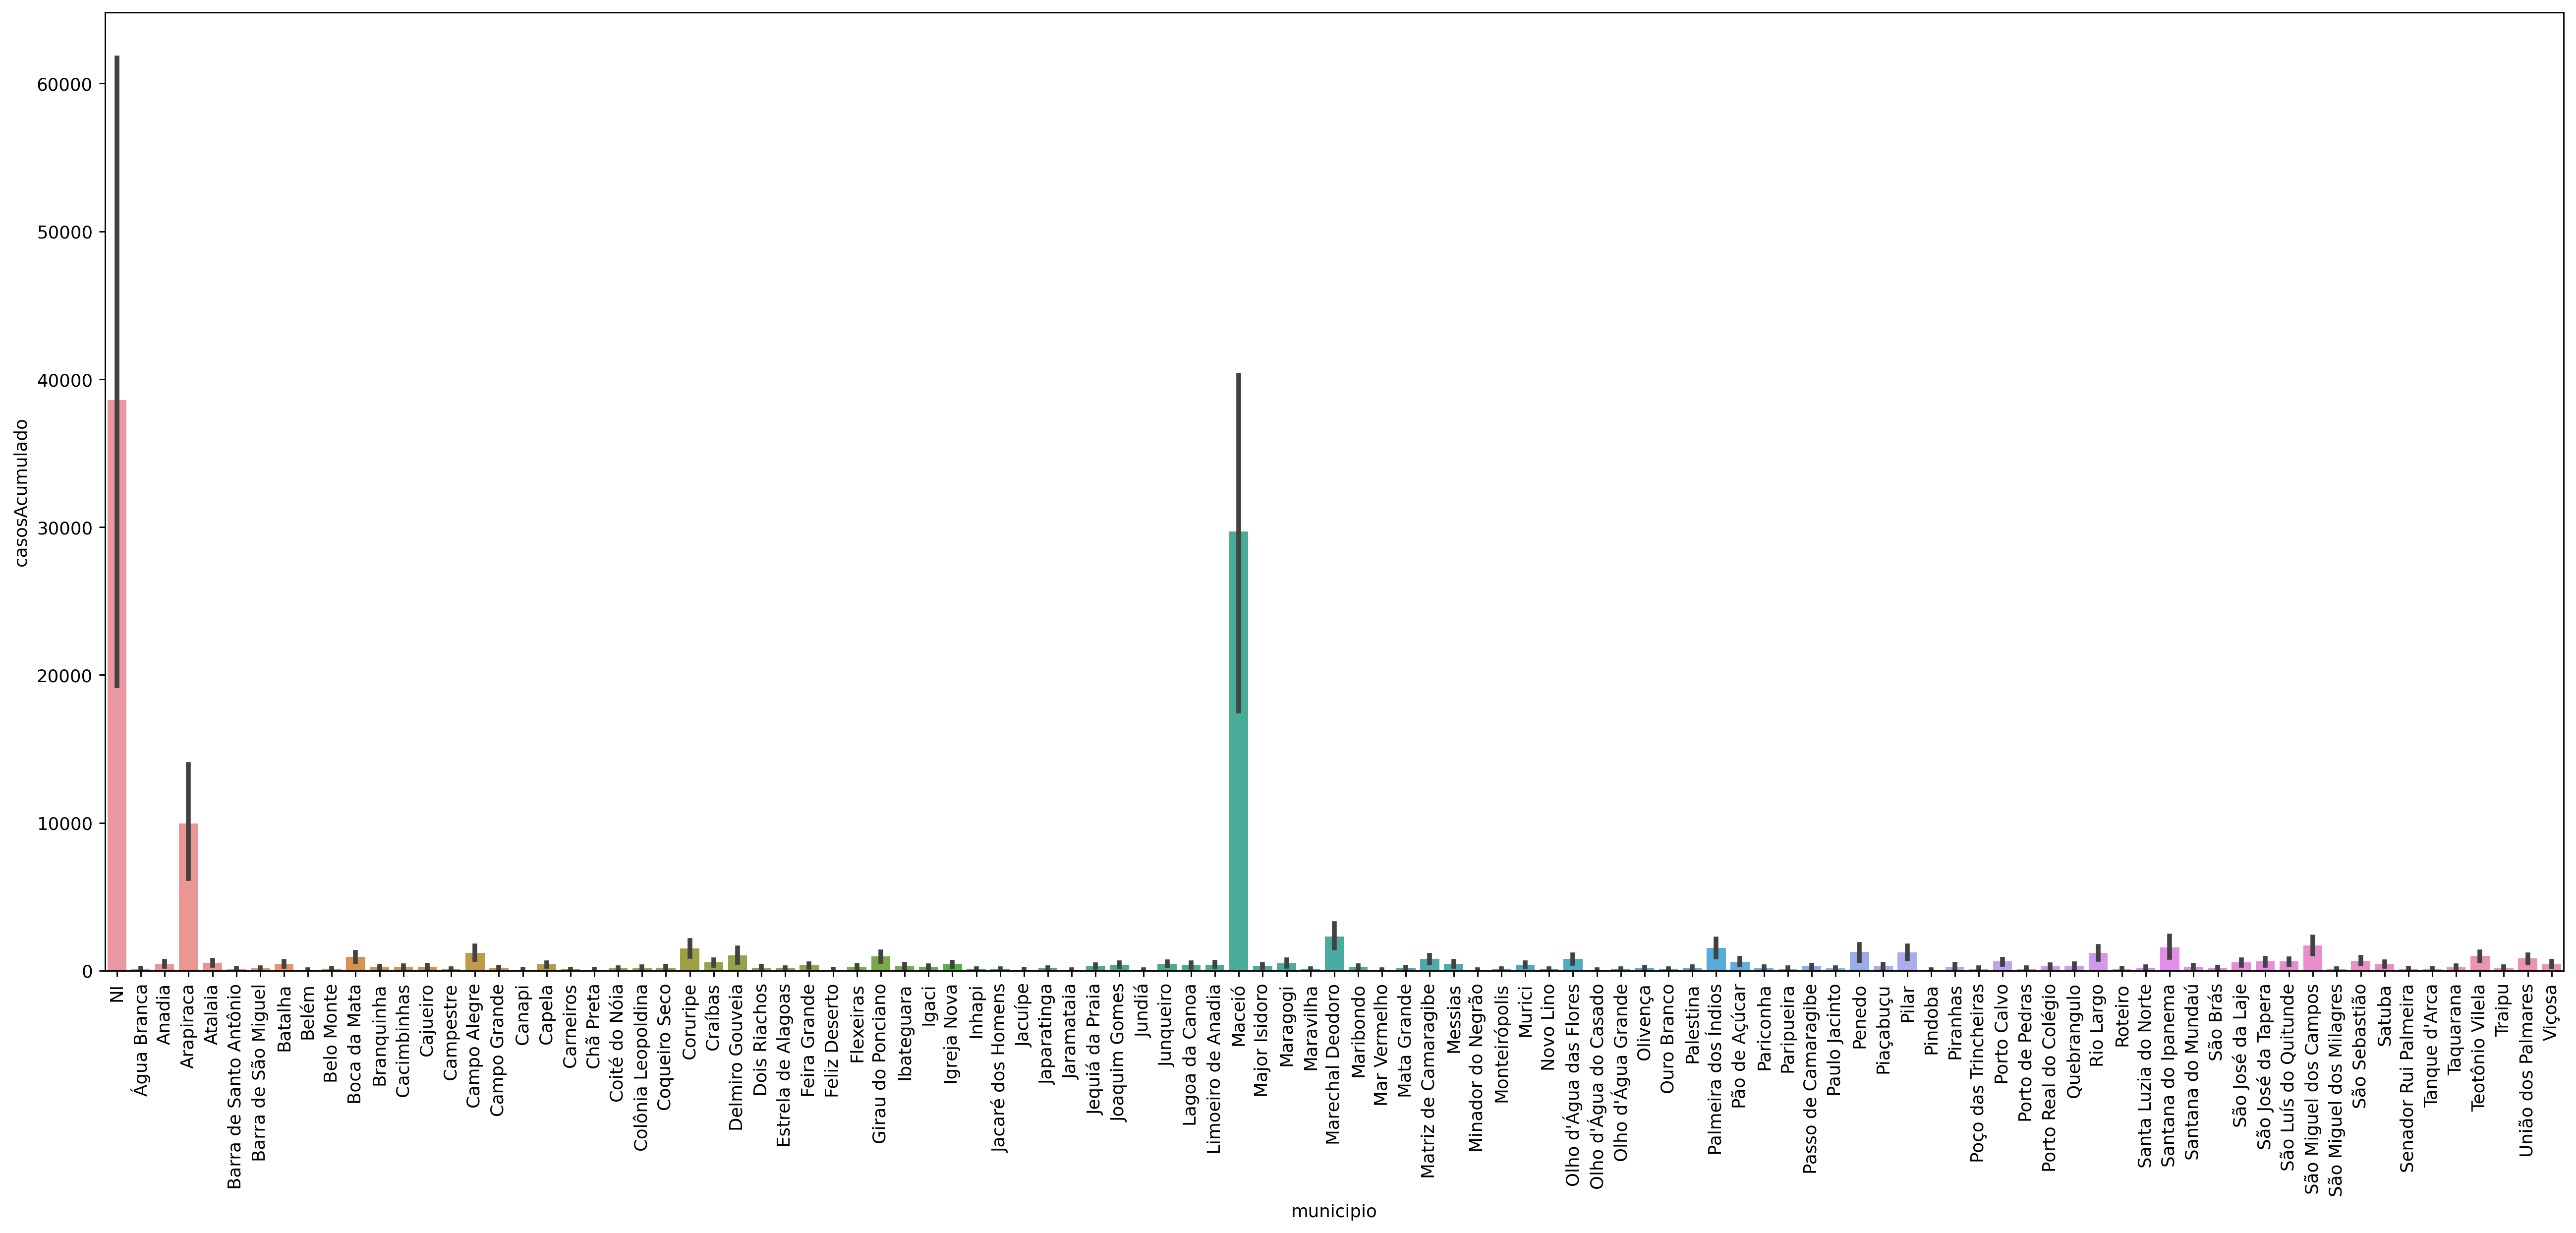

In [79]:
temp = filtro_mes()

plt.figure(figsize=(25,10), dpi=256)
sns.barplot(x='municipio',y='casosAcumulado',data=temp)
plt.xticks(rotation=90)
plt.show()

In [88]:
temp.head(50)

,estado,municipio,nomeRegiaoSaude,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
regiao,,,,,,,,,
Nordeste,AL,NI,NI,2020-03-01,3337357.0,0,0,0,0
Nordeste,AL,NI,NI,2020-04-01,3337357.0,18,0,1,0
Nordeste,AL,NI,NI,2020-04-01,0.0,0,-4,0,0
Nordeste,AL,Água Branca,10ª REGIAO DE SAUDE,2020-04-01,20196.0,0,0,0,0
Nordeste,AL,Anadia,5ª REGIAO DE SAUDE,2020-04-01,17545.0,0,0,0,0
Nordeste,AL,Arapiraca,7ª REGIAO DE SAUDE,2020-04-01,231747.0,0,0,0,0
Nordeste,AL,Atalaia,4ª REGIAO DE SAUDE,2020-04-01,47185.0,0,0,0,0
Nordeste,AL,Barra de Santo Antônio,1ª REGIAO DE SAUDE,2020-04-01,15932.0,0,0,0,0
Nordeste,AL,Barra de São Miguel,1ª REGIAO DE SAUDE,2020-04-01,8322.0,0,0,0,0


## Data Analyzing

In [28]:
dataFrame

,estado,municipio,nomeRegiaoSaude,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
regiao,,,,,,,,,
Norte,RO,NI,NI,2020-02-25,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-26,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-27,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-28,1777225.0,0,0,0,0
Norte,RO,NI,NI,2020-02-29,1777225.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-04-30,3015268.0,378783,1127,7798,37
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-05-01,3015268.0,379752,969,7826,28
Centro-Oeste,DF,Brasília,DISTRITO FEDERAL,2021-05-02,3015268.0,380639,887,7855,29
